In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
import torchvision.transforms as T
from PIL import Image

## 1D Gaussian filter
def genGausKernel1D(width, sigma):
    arr = np.arange((width//2)*(-1), (width//2)+1)
    arr = np.array([float(x) for x in arr]) # float 처리를 하지 않을 경우 값이 달라질 수 있어서 float 처리를 했습니다.

    kernel_1d= np.exp((-arr*arr)/(2*sigma**2)) # 수식 적용을 하되 앞에 상수 부분 생략했습니다.
    kernel_1d /= kernel_1d.sum() # kernel은 모든 element의 합이 1이어야하기 때문에 전체 수의 합으로 나눠줍니다.
    
    return np.array([kernel_1d])

## torch Gaussian filter
# img = Image.open('spice.jpg')
# transform = T.GaussianBlur(kernel_size=(7, 13), sigma=(9, 11))
# img = transform(img)
# img.show()

In [17]:
genGausKernel1D(7, 3)

array([[0.10628852, 0.14032134, 0.16577007, 0.17524014, 0.16577007,
        0.14032134, 0.10628852]])

In [23]:
## 2D Gaussian filter
width = 11
sigma = 3 
kernel_x = genGausKernel1D(width, sigma) 
kernel_y = kernel_x.T
kernel_2d = np.outer(kernel_x, kernel_y)

def genGaussianKernel(width, sigma):
    array = np.arange((width//2)*(-1), (width//2)+1)
    arr = np.zeros((width, width)) # x^2+y^2
    
    for x in range(width):
        for y in range(width):
            arr[x,y] = array[x]**2+array[y]**2 # 중심에서부터의 거리를 제곱합으로 계산 합니다.
            
    kernel_2d = np.zeros((width, width)) # 커널의 값을 저장할 매트릭스 생성 합니다.
    
    for x in range(width):
        for y in range(width):
             kernel_2d[x,y] = np.exp(-arr[x,y]/(2*sigma**2)) # 수식 적용을 하되 앞에 상수 부분 생략했습니다.
                
    kernel_2d /= kernel_2d.sum() # kernel은 모든 element의 합이 1이어야하기 때문에 전체 수의 합으로 나눠줍니다.

    return kernel_2d

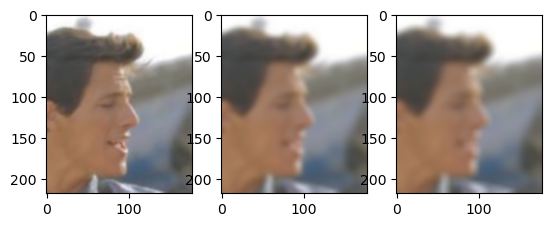

In [47]:
img = cv2.imread('./data/archive/img_align_celeba/img_align_celeba/000003.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel_1 = genGaussianKernel(5,1) # 5 by 5 kernel with sigma of 1
kernel_2 = genGaussianKernel(11,3)
kernel_3 = genGaussianKernel(11,6)

res_kernel1 = cv2.filter2D(img, -1, kernel_1)
res_kernel2 = cv2.filter2D(img, -1, kernel_2)
res_kernel3 = cv2.filter2D(img, -1, kernel_3)


plt.subplot(1,3,1)
plt.imshow(res_kernel1)
plt.subplot(1,3,2)
plt.imshow(res_kernel2)
plt.subplot(1,3,3)
plt.imshow(res_kernel3)

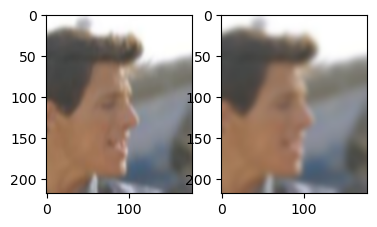

In [48]:
res_kernel4 = cv2.filter2D(res_kernel1, -1, kernel_y)
res_kernel5 = cv2.filter2D(res_kernel2, -1, kernel_y)

plt.subplot(1,3,1)
plt.imshow(res_kernel4)
plt.subplot(1,3,2)
plt.imshow(res_kernel5)